In [ ]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import seaborn as sns
import glob
import plotly.figure_factory as ff
import plotly, geopandas, shapely
import plotly.io as pio

pio.renderers

# Navigate
os.getcwd()

### The Datasets

#### EV Charging  Data - CA Counties
I got this dataset from California Energy Commission (CEC), which was obtained from the Alternative Fuels Data Center Station Locator (AFDC), managed by the National Renewable Energy Laboratory (NREL). Reporters of public charging data include: .... 

`Public`: Charging data must be reported to the NREL by station operators or developers. Public charging data includes


`Private` :Charger counts are obtained from voluntary surveys issued by the CEC, which are sent to Electric Vehicle Service Providers (EVSP) & Non-EVSPs. Shared private chargers include:
- workplaces
- multi-family housing
- fleets
- other non-public venues

    **The following have provided responses to the voluntary survey:**
    Blink/SemaConnect, ChargePoint, Enel X, EV Connect, EVgo, Flo, FreeWire, Greenlots/Shell, KITU Systems, Department of General Services, Pacific Gas & Electric, Southern California Edison, San Diego Gas & Electric, City of Anaheim, City of Vernon, Los Angeles Department of Water and Power, PowerFlex, Redding Public Utility, Rivian, Sacramento Municipal Utility District, Silicon Valley Power, and Tesla.


**citation:** California Energy Commission (2023). Electric Vehicle Chargers in California. Data last updated [09/16/2023]. Retrieved [11/19/2023] from https://www.energy.ca.gov/zevstats

#### FIPS
Every US state and county has an assigned ID regulated by the US Federal Government under the term FIPS (Federal Information Processing Standards) codes.

`FIPS`: a state FIPS code (eg. 06 for California) with a county FIPS code of the state (eg. 059 for Orange county) and this new state-county FIPS code (06059) uniquely refers to the specified state and county.
**citation:** https://github.com/kjhealy/fips-codes/blob/master/county_fips_master.csv

#### Additional Data .. : state effects, fixed effects, seasonality


### Objective

In 2021, the Bipartisan group announced a large investment in infrastructure including ***$7.5 billion to build out a national network of EV Chargers*

source: https://www.whitehouse.gov/briefing-room/statements-releases/2021/07/28/fact-sheet-historic-bipartisan-infrastructure-deal/

My goal is to analyze charging data across counties in California across 2021 to...
- make decisions about 2022
- predict number of chargers in 2022
- trends in CA chargers
- choose the best charging location in 2022


In [ ]:
os.getcwd()

new_path = '/Users/sarasharifzadeh/anaconda3/APROJECTS/projectfiles/ev/ev2021'
os.chdir(new_path)

### EDA

In [3]:
# the data: quarter1 2021, quarter 2 2021... 
# goal: all quarters for a year in one df with labels for which quarter

#2021 - put all quarters into one df / csv

# ev21 = pd.DataFrame([])

# #read all CSV files and append them to df
# for root, dirs, files in os.walk("."):
#     for name in files:
#         ev_temp = pd.read_csv(name)
#         ev_temp["Quarter"] = name
#         ev21 = pd.concat([ev21,ev_temp])

# ev21
        
# # #Save df to a CSV file
# ev21.to_csv('ev2021.csv')


# # #2022

# # ev22 = pd.DataFrame([])

# # #read all CSV files and append them to df
# # for root, dirs, files in os.walk("."):
# #     for name in files:
# #         ev_temp = pd.read_csv(name)
# #         ev_temp["Quarter"] = name
# #         ev22 = pd.concat([ev22,ev_temp])

# # ev22
        
# # # #Save df to a CSV file
# # ev22.to_csv('ev2022.csv')


ev21 = pd.read_csv("ev2021.csv")
ev21 = ev21.drop(columns=["Unnamed: 0"])

#changing path
new_path = '/Users/sarasharifzadeh/anaconda3/APROJECTS/projectfiles/ev/ev2022'
os.chdir(new_path)


ev22 = pd.read_csv("ev2022.csv")
ev22 = ev22.drop(columns=["Unnamed: 0"])
ev22
ev21.shape, ev22.shape

((240, 9), (240, 9))

In [4]:
import re
#cleaning the Quarter with regex 
    #currently "q1_22.csv" goal: q1
#https://regex101.com

pattern21 = '(\d\d\d\d.\w\w\w)'
text = 'q12021.csv'

ev21["Quarter"] = ev21["Quarter"].str.replace(pattern21, "", regex=True)
ev21


pattern22 = '(\w\d\d.\w\w\w)'
text = "q3_22.csv"

ev22["Quarter"] = ev22["Quarter"].str.replace(pattern22, "", regex=True)
ev22


ev21
# re.sub(pattern21, '', text) 

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total,Quarter
0,Alameda,6,70,1671,1583,332,35,3697,q4
1,Alpine,0,0,14,0,0,0,14,q4
2,Amador,0,0,25,6,8,0,39,q4
3,Butte,6,0,41,23,24,0,94,q4
4,Calaveras,0,2,7,0,12,0,21,q4
...,...,...,...,...,...,...,...,...,...
235,Unknown,0,0,0,11,0,0,11,q1
236,Ventura,6,0,387,312,121,19,845,q1
237,Yolo,12,0,156,130,26,0,324,q1
238,Yuba,0,0,9,7,0,0,16,q1


In [5]:
#correct number of County names - 1 per quarter 

ev22 = ev22.sort_values("Quarter")
ev21 = ev21.sort_values("Quarter")

ev21[ev21["County"] == "Alameda"] #checked

#ev22[ev22["County"] == "Alameda"] #checked

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total,Quarter
180,Alameda,14,14,1519,1472,296,38,3353,q1
60,Alameda,14,63,1633,1497,310,43,3560,q2
120,Alameda,14,66,1633,1554,315,43,3625,q3
0,Alameda,6,70,1671,1583,332,35,3697,q4


#### Lets Visualize Total EV Chargers per County before Analysis 

I need to import FIPS Data to map State & County Codes

In [6]:
#Visualing CA chargers 

#need fIPS
new_path = '/Users/sarasharifzadeh/anaconda3/APROJECTS/projectfiles/ev'
os.chdir(new_path)

#fips = pd.read_csv("county_fips_master.csv")

#ENCODING ERROR
import chardet

with open('county_fips_master.csv', 'rb') as f:
    result = chardet.detect(f.read())

fips = pd.read_csv('county_fips_master.csv', encoding=result['encoding'])
CAfips = fips[fips['state_abbr']== 'CA']
CAfips = CAfips[["fips", "county_name"]]

CAfips["county_name"] = CAfips["county_name"].str.replace(" County", "")
CAfips.head()

,fips,county_name
187,6001,Alameda
188,6003,Alpine
189,6005,Amador
190,6007,Butte
191,6009,Calaveras


In [7]:
ev21["County"] = ev21["County"].astype(str)
CAfips["county_name"] = CAfips["county_name"].astype(str)

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [13]:
# mapev21 = ev21.merge(CAfips, left_on="County", right_on="county_name", how='inner')
# mapev21

# values = mapev21['Total'].tolist()
# fips = mapev21['fips'].tolist()
# # # #endpts = np.arange(0, 21100, 2000)
# # # #endpts = [0,  2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000,
# # #        18000, 21000]
# # #endpts = list(np.linspace(0, 21100, num=10))
# # # endpts = list(np.mgrid[min(values):max(values):16j])
# endpts = [1, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 15000, 20000]

# colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
#               "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
#               "#08519c","#0b4083","#08306b"]

# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, round_legend_values=True,
#     binning_endpoints=endpts,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)', 
#     legend_title='Total Chargers by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     title_text = 'Total EV Chargers per CA County',
#     exponent_format=True,
# )
# fig.layout.template = None

# fig.show(renderer="svg")

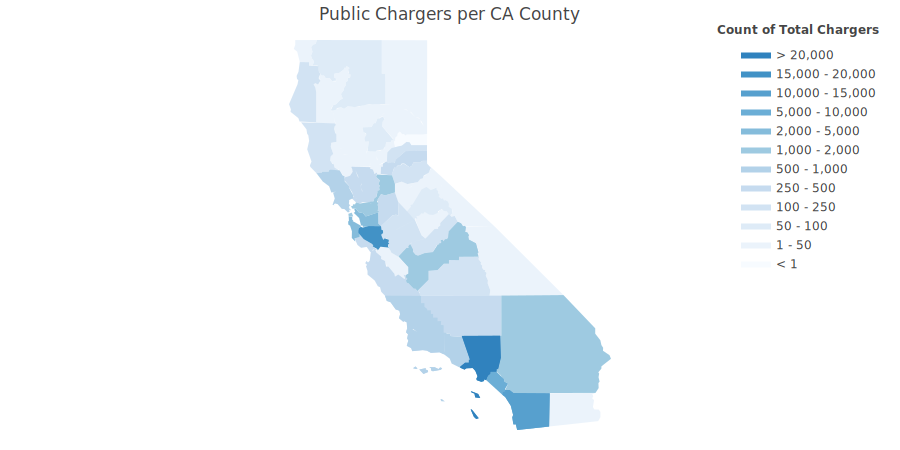

In [9]:
# NOTE - the data is too uneven to use uniform bins, I intentionally used non-uniform bins

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

#np.logspace(np.log10(0.1),np.log10(1.0), 50)

#endpts = list(np.mgrid[min(values):max(values):16j])
endpts = [1, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 15000, 20000]
values = mapev21['Total'].tolist()
fips = mapev21['fips'].tolist()


fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=endpts, 
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True,
    asp = 2.9,
    title_text = 'Public Chargers per CA County',
    legend_title = 'Count of Total Chargers'
)
fig.layout.template = None
fig.show(renderer="svg")

## Analysis - Total v. Public v. Private v. DC Fast



### 5 Counties with the most chargers in 2021
#### Los Angeles, Santa Clara,  Orange, San Diego, San Mateo

In [10]:
ev21.groupby("County").sum().sort_values("Total", ascending=False).iloc[1:6, :]#[ev21["County"] != 'Total']

,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total,Quarter
County,,,,,,,,
Los Angeles,130,487,28151,48041,3615,475,80899,q1q2q3q4
Santa Clara,23,244,14508,46805,2164,349,64093,q1q2q3q4
San Diego,8,42,7740,22102,1337,202,31431,q1q2q3q4
Orange,31,0,10288,9783,1992,134,22228,q1q2q3q4
San Mateo,8,124,7931,8490,1041,147,17741,q1q2q3q4


### 5 counties with the most Public Chargers

In [14]:
public21 = ev21[["County", "Public Level 1", "Public Level 2", "Public DC Fast"]]#.sum()
public21["Total"] =  public21["Public Level 1"] + public21["Public Level 2"] + public21["Public DC Fast"]
public21

public21.groupby("County").sum().sort_values("Total", ascending=False).iloc[1:6, :]

,Public Level 1,Public Level 2,Public DC Fast,Total
County,,,,
Los Angeles,130,28151,3615,31896
Santa Clara,23,14508,2164,16695
Orange,31,10288,1992,12311
San Diego,8,7740,1337,9085
San Mateo,8,7931,1041,8980


### 5 counties with the most Private Chargers: 

In [12]:
priv21 = ev21[["County", "Shared Private Level 1", "Shared Private Level 2", "Shared Private DC Fast"]]#.sum()
priv21["Total"] =  priv21["Shared Private Level 1"] + priv21["Shared Private Level 2"] + priv21["Shared Private DC Fast"]
priv21

priv21.groupby("County").sum().sort_values("Total", ascending=False).iloc[1:6, :]

,Shared Private Level 1,Shared Private Level 2,Shared Private DC Fast,Total
County,,,,
Los Angeles,487,48041,475,49003
Santa Clara,244,46805,349,47398
San Diego,42,22102,202,22346
Orange,0,9783,134,9917
San Mateo,124,8490,147,8761


## Why do these Counties have the most chargers? 

* `Los Angeles` 
* `Santa Clara`
* `San Diego`
* `Orange`
* `San Mateo`



#### Note: 
The count of Public chargers in Alameda changed from 14 in 2021 to 0 in 2022, why?

In [ ]:
#subtract off the bumber of chargers 
#- why is Public Level 1 0 now? in 2022?

In [ ]:
# import plotly.express as px

# geojson = px.data.election_geojson()

# fig = px.choropleth_mapbox(ev, geojson=geojson, color="Total",
#                            locations="County", featureidkey="County",
#                            center={"lat": 36.77, "lon": -119.417},
#                            mapbox_style="carto-positron", zoom=9)
# fig.show()

In [ ]:
new21.groupby(["County", "Quarter"]).sum() #just changes indexing

### Analysis on Public Level 1 - Public & Shared Private

**Notes:**
Public charging ....
Private Shared chargin ...

what happened in the years 2020 & 2021 that can intuitively tell us about chargers?


articles, evidence.. 




By intuition, the first four are the largest cities in California with {progressive focus on efficient energy}. However, there are also {laws, initiatives}. Yolo County is included in this 
This is likely because, 

### Chargers By Population - Which counties do not have enough chargers?

In [46]:
#need populations
new_path = '/Users/sarasharifzadeh/anaconda3/APROJECTS/projectfiles/ev'
os.chdir(new_path)


pop = pd.read_csv("capop.csv")
pop = pop.rename(columns={"California": "county", "2021": "population"})
pat = "[^\w]"
pop["county"] = pop["county"].str.replace(pat, "", regex=True)

popmap21 = mapev21.merge(pop, left_on="County", right_on="county", how="inner")
popmap21
popmap21["population"] = popmap21["population"].apply(lambda a: int(a.replace(',', '')))

popmap21["per"] = popmap21["population"].astype(int) / popmap21["Total"].astype(int)
min(popmap21["per"]), max(popmap21["per"])

(82.33333333333333, 6637.592592592592)

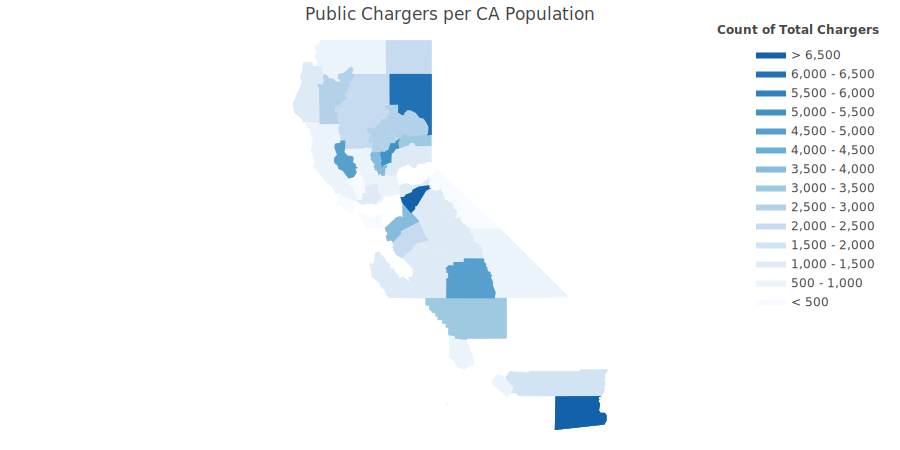

In [47]:

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

#np.logspace(np.log10(0.1),np.log10(1.0), 50)

#endpts = list(np.mgrid[min(values):max(values):16j])
endpts = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500]
values = popmap21['per'].tolist()
fips = popmap21['fips'].tolist()


fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=endpts, 
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True,
    asp = 2.9,
    title_text = 'Public Chargers per CA Population',
    legend_title = 'Count of Total Chargers'
)
fig.layout.template = None
fig.show(renderer="svg")